In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta 
from zipfile import ZipFile

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', 50)

news_df = pd.read_csv('../data/raw_analyst_ratings.csv')
news_df['date'] = pd.to_datetime(news_df['date'], utc=True).dt.date

print("News data loaded successfully.")
news_df.head()

News data loaded successfully.


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [4]:
STOCK_TICKER = 'AAPL' 

zip_file_path = '../data/yfinance_data.zip'


stock_file_name = f'yfinance_data/{STOCK_TICKER}_historical_data.csv'

try:
    with ZipFile(zip_file_path) as z:
        with z.open(stock_file_name) as f:
            stock_df = pd.read_csv(f)
            print(f"Successfully loaded {STOCK_TICKER} data.")
except KeyError:
    print(f"Error: The file '{stock_file_name}' was not found inside the zip archive.")
except FileNotFoundError:
    print(f"Error: The zip archive '{zip_file_path}' was not found.")


stock_df.head()

Successfully loaded AAPL data.


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [5]:
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
stock_df.set_index('Date', inplace=True)
stock_df.sort_index(inplace=True)

stock_df.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
}, inplace=True)

stock_df.ffill(inplace=True)

print("\nStock data prepared and columns renamed for TA-Lib:")
print(stock_df.info())
stock_df.head()


Stock data prepared and columns renamed for TA-Lib:
<class 'pandas.core.frame.DataFrame'>
Index: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          10998 non-null  float64
 1   high          10998 non-null  float64
 2   low           10998 non-null  float64
 3   close         10998 non-null  float64
 4   adj_close     10998 non-null  float64
 5   volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 773.3+ KB
None


,open,high,low,close,adj_close,volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [6]:
# Calculate 20-day Simple Moving Average
stock_df['sma_20'] = ta.SMA(stock_df['close'], timeperiod=20)

# Calculate 50-day Simple Moving Average
stock_df['sma_50'] = ta.SMA(stock_df['close'], timeperiod=50)

print("SMA indicators calculated.")
stock_df[['close', 'sma_20', 'sma_50']].tail() 

SMA indicators calculated.


,close,sma_20,sma_50
Date,,,
2024-07-24,218.539993,224.228500,208.474199
2024-07-25,217.490005,224.440500,209.098399
2024-07-26,217.960007,224.633500,209.709000
2024-07-29,218.240005,225.014500,210.279400
2024-07-30,218.800003,225.117001,210.858600


In [7]:
# Calculate 14-day Relative Strength Index (RSI)
stock_df['rsi_14'] = ta.RSI(stock_df['close'], timeperiod=14)

print("RSI indicator calculated.")
stock_df[['close', 'rsi_14']].tail()

RSI indicator calculated.


,close,rsi_14
Date,,
2024-07-24,218.539993,48.687742
2024-07-25,217.490005,47.386437
2024-07-26,217.960007,48.055700
2024-07-29,218.240005,48.476184
2024-07-30,218.800003,49.359115


In [8]:
# Calculate MACD
stock_df['macd'], stock_df['macdsignal'], stock_df['macdhist'] = ta.MACD(
    stock_df['close'], 
    fastperiod=12, 
    slowperiod=26, 
    signalperiod=9
)

print("MACD indicators calculated.")
stock_df[['close', 'macd', 'macdsignal', 'macdhist']].tail()

MACD indicators calculated.


,close,macd,macdsignal,macdhist
Date,,,,
2024-07-24,218.539993,4.662717,6.678882,-2.016164
2024-07-25,217.490005,3.748082,6.092722,-2.344640
2024-07-26,217.960007,3.026267,5.479431,-2.453164
2024-07-29,218.240005,2.448591,4.873263,-2.424672
2024-07-30,218.800003,2.012764,4.301163,-2.288399


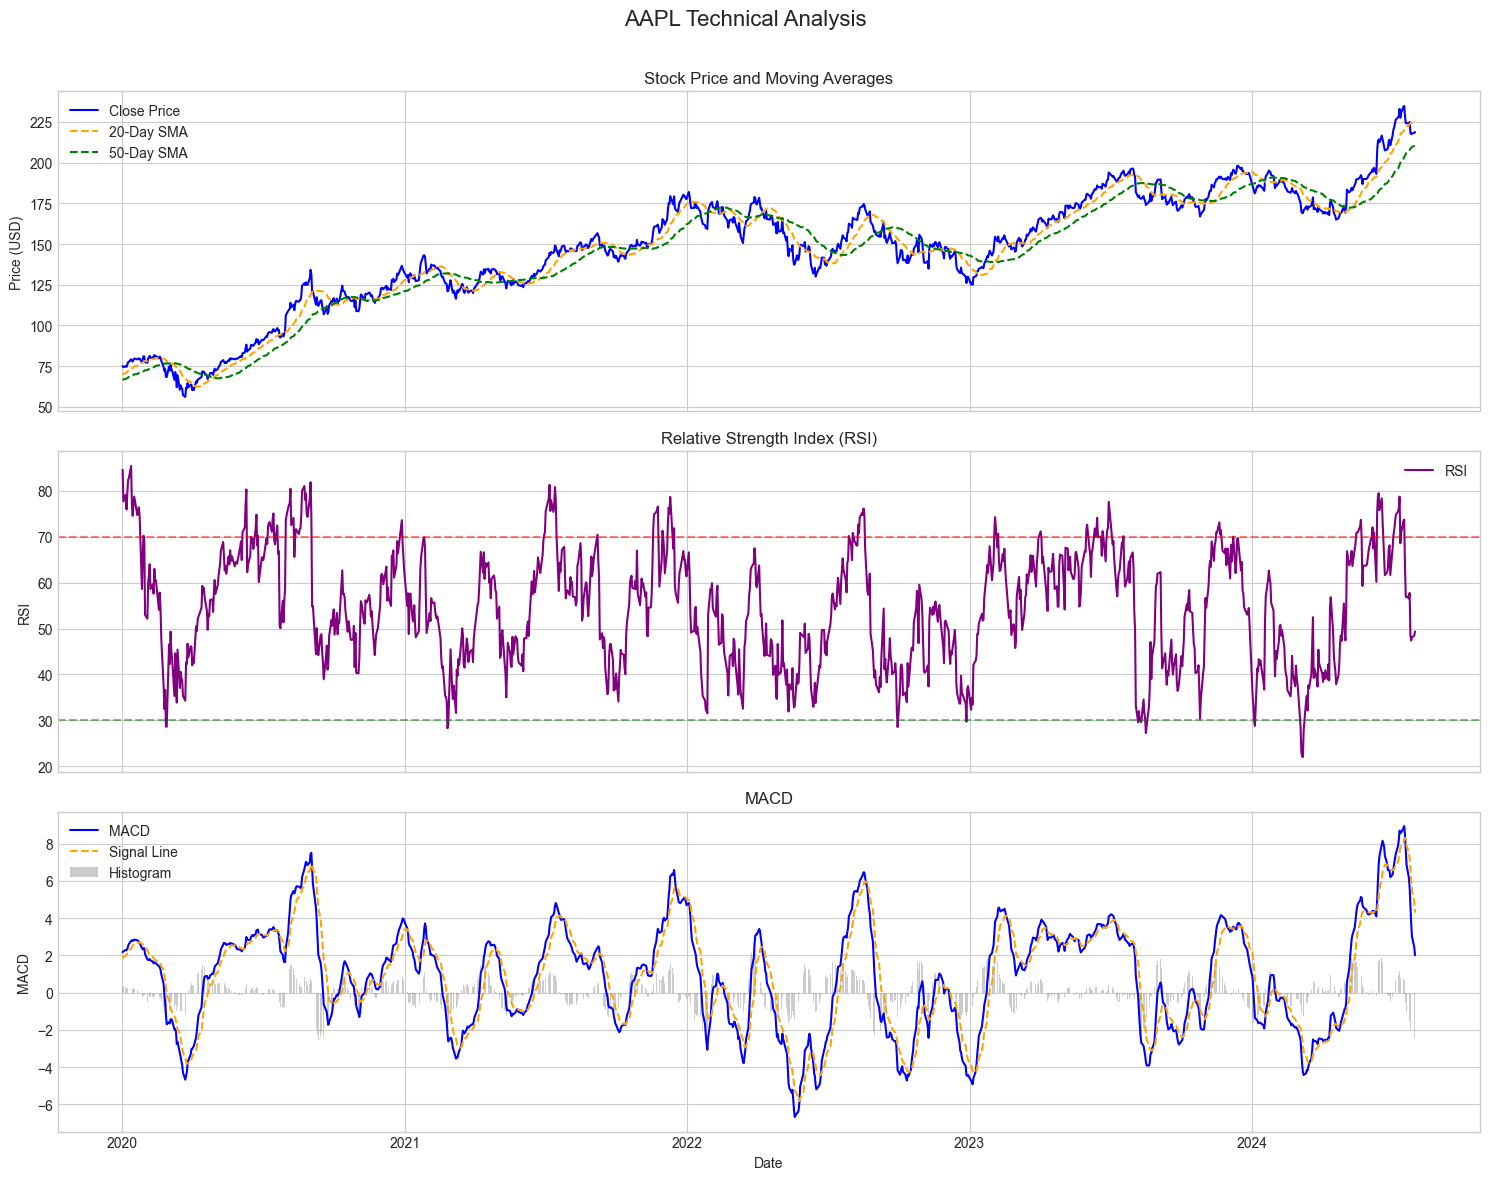

In [11]:
import datetime

start_date = datetime.date(2020, 1, 1)
df_plot = stock_df.loc[start_date:]

fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle(f'{STOCK_TICKER} Technical Analysis', fontsize=16)

# Plot 1: Closing Price and Moving Averages
axes[0].plot(df_plot.index, df_plot['close'], label='Close Price', color='blue')
axes[0].plot(df_plot.index, df_plot['sma_20'], label='20-Day SMA', color='orange', linestyle='--')
axes[0].plot(df_plot.index, df_plot['sma_50'], label='50-Day SMA', color='green', linestyle='--')
axes[0].set_ylabel('Price (USD)')
axes[0].set_title('Stock Price and Moving Averages')
axes[0].legend()

# Plot 2: RSI
axes[1].plot(df_plot.index, df_plot['rsi_14'], label='RSI', color='purple')
axes[1].axhline(70, linestyle='--', color='red', alpha=0.5)
axes[1].axhline(30, linestyle='--', color='green', alpha=0.5)
axes[1].set_ylabel('RSI')
axes[1].set_title('Relative Strength Index (RSI)')
axes[1].legend()

# Plot 3: MACD
axes[2].plot(df_plot.index, df_plot['macd'], label='MACD', color='blue')
axes[2].plot(df_plot.index, df_plot['macdsignal'], label='Signal Line', color='orange', linestyle='--')
axes[2].bar(df_plot.index, df_plot['macdhist'], label='Histogram', color='grey', alpha=0.4)
axes[2].set_ylabel('MACD')
axes[2].set_title('MACD')
axes[2].legend()

plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()

In [13]:
daily_returns = stock_df['close'].pct_change().dropna()

annual_risk_free_rate = 0.02
daily_risk_free_rate = (1 + annual_risk_free_rate)**(1/252) - 1 

excess_daily_returns = daily_returns - daily_risk_free_rate

sharpe_ratio = excess_daily_returns.mean() / excess_daily_returns.std() * np.sqrt(252)


print(f"Manually Calculated Financial Metric for {STOCK_TICKER}:")
print("-" * 50)
print(f"Annualized Sharpe Ratio: {sharpe_ratio:.4f}")
print("\n(Note: A Sharpe Ratio > 1 is generally considered good, > 2 is very good)")

Manually Calculated Financial Metric for AAPL:
--------------------------------------------------
Annualized Sharpe Ratio: 0.5657

(Note: A Sharpe Ratio > 1 is generally considered good, > 2 is very good)
